In [1]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

In [1]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_data_dir = './train/'
test_data_dir = './test/'

# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # optional dropout layer for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Save the trained model
# model.save('drowsiness_detection_model.h5')



Found 2149 images belonging to 2 classes.
Found 271 images belonging to 2 classes.



Epoch 1/10


68/68 [==============================] - 160s 2s/step - loss: 0.6281 - accuracy: 0.6375 - val_loss: 0.4218 - val_accuracy: 0.7934
Epoch 2/10
68/68 [==============================] - 82s 1s/step - loss: 0.4448 - accuracy: 0.7822 - val_loss: 0.2403 - val_accuracy: 0.9262
Epoch 3/10
68/68 [==============================] - 79s 1s/step - loss: 0.2705 - accuracy: 0.8827 - val_loss: 0.1401 - val_accuracy: 0.9705
Epoch 4/10
68/68 [==============================] - 80s 1s/step - loss: 0.2109 - accuracy: 0.9186 - val_loss: 0.1399 - val_accuracy: 0.9483
Epoch 5/10
68/68 [==============================] - 82s 1s/step - loss: 0.1612 - accuracy: 0.9423 - val_loss: 0.1307 - val_accuracy: 0.9631
Epoch 6/10
68/68 [==============================] - 80s 1s/step - loss: 0.0968 - accuracy: 0.9651 - val_loss: 0.0552 - val_accuracy: 0.9815
Epoch 7/10
68/68 [==============================] - 81s 1s/step - loss

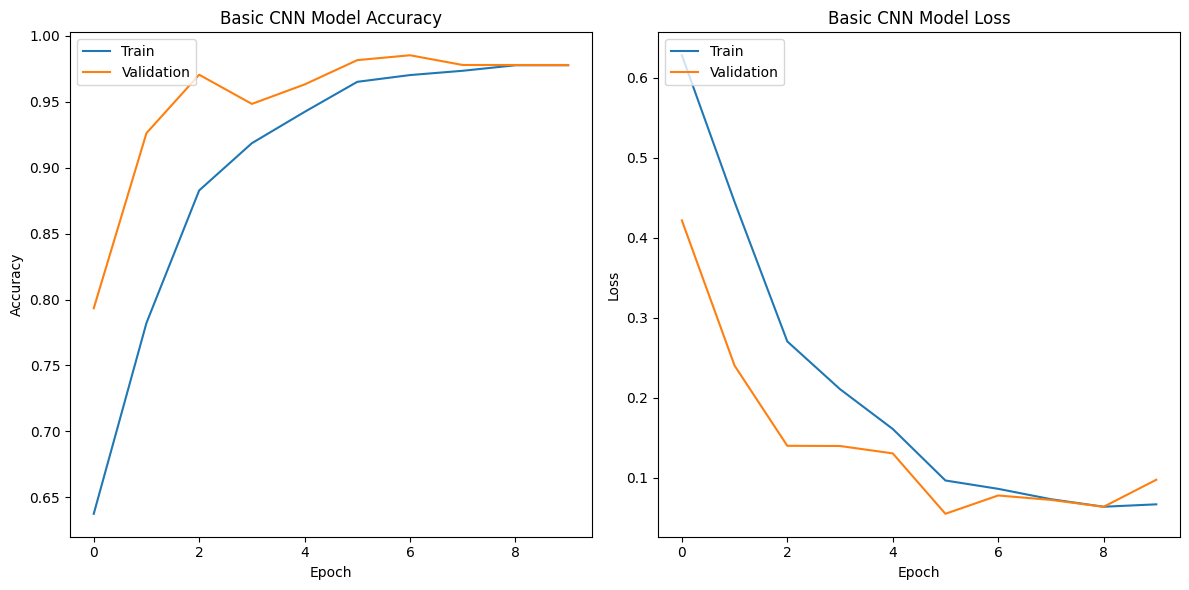

In [2]:
import matplotlib.pyplot as plt

# Assuming you have already trained the basic CNN model using model.fit()

# Plotting for the basic CNN model
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Basic CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Basic CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [2]:
# Define paths to your dataset
train_data_dir = './train/'
test_data_dir = './test/'
val_data_dir = './val/'

# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 13

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # optional dropout layer for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the trained model
# model.save('drowsiness_detection_model.h5')


Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.



Epoch 1/13


68/68 [==============================] - 107s 2s/step - loss: 0.6953 - accuracy: 0.5756 - val_loss: 0.5016 - val_accuracy: 0.7649
Epoch 2/13
68/68 [==============================] - 63s 926ms/step - loss: 0.4951 - accuracy: 0.7576 - val_loss: 0.3041 - val_accuracy: 0.8619
Epoch 3/13
68/68 [==============================] - 69s 1s/step - loss: 0.3530 - accuracy: 0.8506 - val_loss: 0.1559 - val_accuracy: 0.9739
Epoch 4/13
68/68 [==============================] - 74s 1s/step - loss: 0.2325 - accuracy: 0.9097 - val_loss: 0.0876 - val_accuracy: 0.9813
Epoch 5/13
68/68 [==============================] - 69s 1s/step - loss: 0.1606 - accuracy: 0.9432 - val_loss: 0.0667 - val_accuracy: 0.9739
Epoch 6/13
68/68 [==============================] - 76s 1s/step - loss: 0.1395 - accuracy: 0.9577 - val_loss: 0.0192 - val_accuracy: 0.9963
Epoch 7/13
68/68 [=========

In [3]:
model.save('drowsiness_detection_model.h5')

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


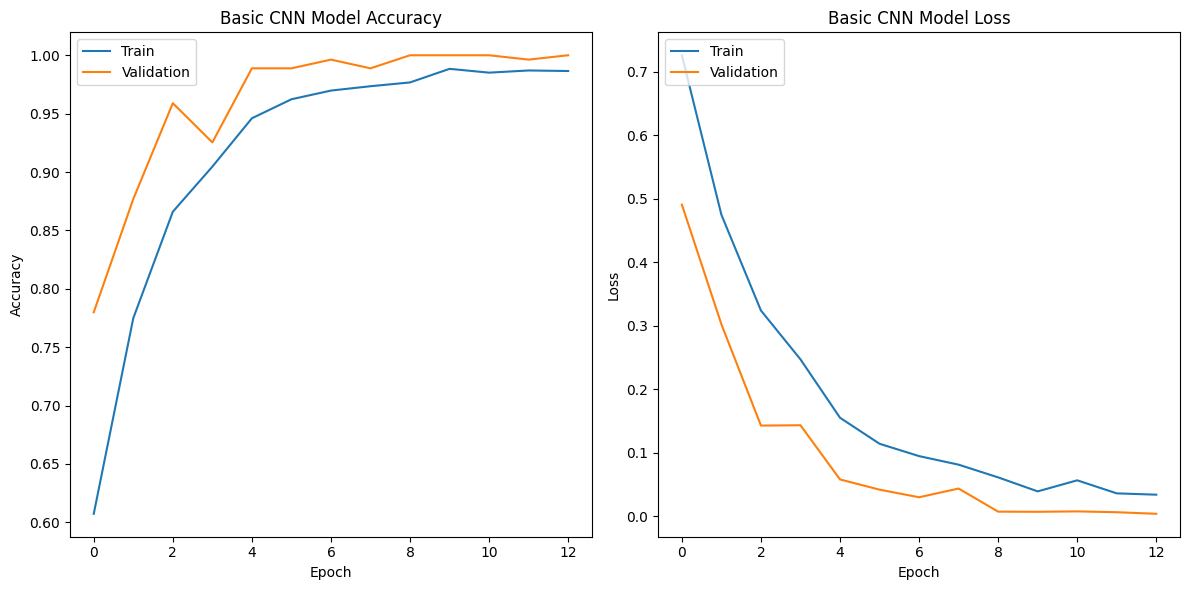

In [4]:
# Plotting for the basic CNN model
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Basic CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Basic CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [23]:
from keras.preprocessing import image
import numpy as np

def test_image(input_path):
    # Load and preprocess the input image
    img_path = input_path  # Replace with the actual path to your input image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values to be in the range [0, 1]

    # Make a prediction
    prediction = model.predict(img_array)

    # Convert the prediction to a human-readable class label
    class_labels = ['Non-Drowsy', 'Drowsy']  # Replace with your actual class labels
    predicted_class = class_labels[int(np.round(prediction[0]))]

    print(f"The model predicts that the image is {predicted_class} with confidence: {prediction[0][0]:.2f}")
    return predicted_class


In [24]:
import os
# os.chdir("./test/alert/")
for alert_img in os.listdir():
    input_path = alert_img
    # count = 0
    # if test_image(input_path)=='Drowsy':
    #     count += 1
    test_image(input_path)
# print(count)

1/1 [==============================] - 0s 26ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 28ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 27ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - ETA: 0s

C:\Users\prans\AppData\Local\Temp\ipykernel_25480\4010284085.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(np.round(prediction[0]))]


1/1 [==============================] - 0s 16ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 15ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 16ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 36ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 15ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 33ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 31ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 34ms/step
The model predicts that the image is Drowsy with confidence: 1.00
1/1 [==============================] - 0s 22ms/step
The 

In [20]:
test_image("./pranshul.jpg")

1/1 [==============================] - 0s 27ms/step


C:\Users\prans\AppData\Local\Temp\ipykernel_25480\670385755.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_labels[int(np.round(prediction[0]))]


0

In [19]:
os.getcwd()

'd:\\Notes\\Minor Project\\utarldd_dataset\\test\\alert'

In [22]:
os.chdir("../tired/")